In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [6]:
colnames = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv("pima-indians-diabetes.data", names = colnames)
df.head(10)

#0 - non diabetic
#1 - diabetic

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.groupby('class').count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


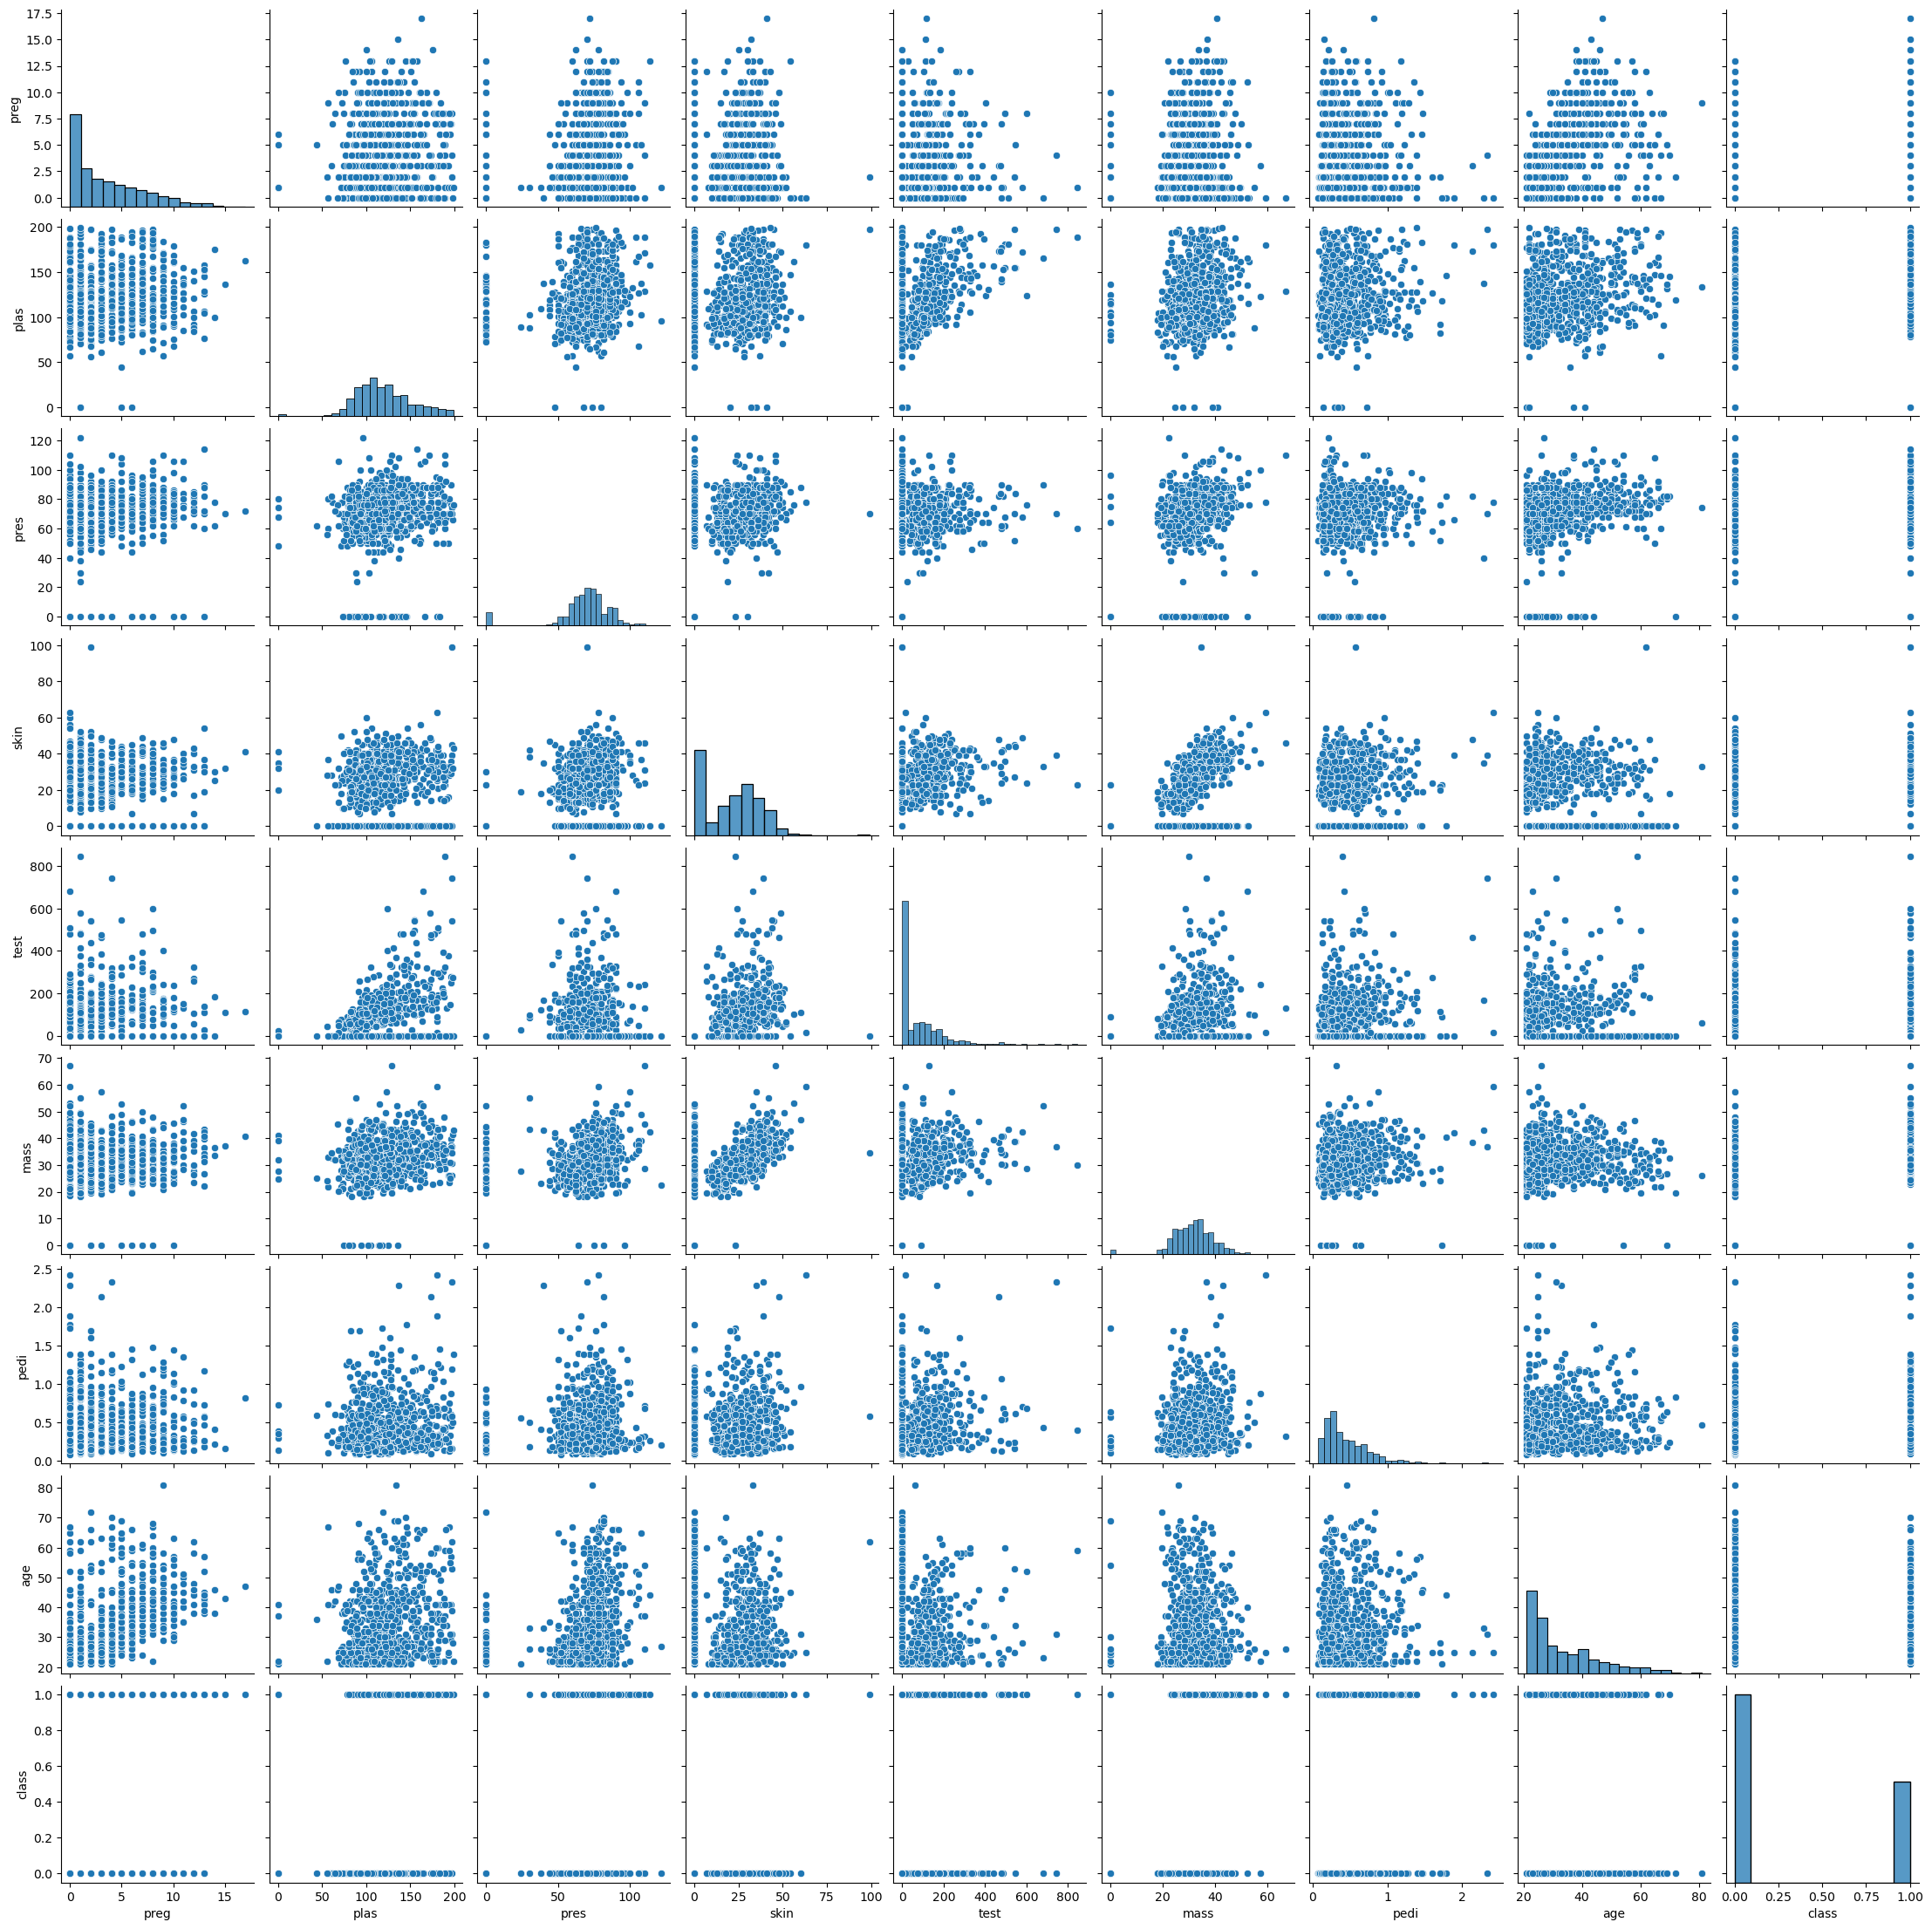

In [8]:
sns.pairplot(df)

In [12]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

test_size = 0.3
seed = 1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

t = list(x_train.columns)

coef_df = pd.DataFrame(model.coef_, columns = t)
coef_df['intercept'] = model.intercept_
coef_df


,preg,plas,pres,skin,test,mass,pedi,age,intercept
0,0.101436,0.033586,-0.015711,-0.001349,-0.000697,0.089437,0.560488,0.017057,-7.868236


In [17]:
model_score = model.score(x_test, y_test)
model_score

0.7835497835497836

In [18]:
print(metrics.confusion_matrix(y_test, y_predict))

[[132  14]
 [ 36  49]]
